## **비지도학습 기말고사**

>(1) 시험시간: 09:00~23:59분까지<br>
>
>(2) 파일이름 작성방법: 비지도학습_기말고사_학번_성명.ipynb<br>
$\quad$ $\checkmark \ $ 주의사항: jupyternotebook file을 실행해 본 후 upload하세요<br>
>
>(3) 답안지 제출 <br>
$\qquad$ www.webhard.co.kr<br>
$\qquad$ ID: lindsey<br>
$\qquad$ PW: start<br>
$\qquad$ 답안제출 Folder: 올리기전용/비지도학습/기말고사제출폴더"에 답안제출<br>
$\quad$ $\checkmark \ $ 빈칸에 프로그램을 작성한 후 실행결과를 제출<br>
$\quad$ $\checkmark \ $ 시험 시간 이후에 upload된 file은 인정하지 않습니다<br>
>(4) 답안지 Report 제출 <br>
$\qquad$ 위의 문제를 다시 풀어 6월 22일 밤 11시 59분까지 다시 제출<br>
$\qquad$ www.webhard.co.kr<br>
$\qquad$ ID: lindsey<br>
$\qquad$ 답안 Report 제출 Folder: 올리기전용/비지도학습/기말고사 Report 제출폴더"에 답안제출<br>

#### **[문제 1]** 
- 다음 make_blobs dataset에 대해 DBSCAN방법을 이용하여 Clustering하고 Clustering된 결과를 출력하시요<br>
- 단 epsilon=0.3, min data수=10으로 설정하시오

In [ ]:
%pip install scikit-learn matplotlib

In [7]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[2, 1], [-2, -1], [2, -1]]
X, labels_true = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.2, random_state=20
)

In [12]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[2, 1], [-2, -1], [2, -1]]
X, labels_true = make_blobs(
    n_samples=500, centers=centers, cluster_std=0.2, random_state=20
)

In [23]:
np.shape(X), type(X), X[:5]

((500, 2),
 numpy.ndarray,
 array([[ 1.69146712,  1.2008161 ],
        [-1.87251837, -1.32188592],
        [-1.87634128, -0.86306701],
        [-2.08240155, -0.77489397],
        [ 1.89360624, -0.97604541]]))

In [19]:
np.shape(labels_true), type(labels_true), labels_true[:10]

((500,), numpy.ndarray, array([0, 1, 1, 1, 2, 1, 1, 2, 1, 1]))

In [24]:
# 데이터 표준화 (DBSCAN에서 거리 기반 계산을 위해 권장)
X_scaled = StandardScaler().fit_transform(X)
np.shape(X_scaled), X_scaled[:5]

((500, 2),
 array([[ 0.54441384,  1.58174084],
        [-1.32704574, -1.03690593],
        [-1.32905316, -0.56063697],
        [-1.43725604, -0.46911049],
        [ 0.6505577 , -0.67791222]]))

In [25]:
# DBSCAN 클러스터링 수행
# eps=0.3: 이웃으로 간주할 최대 거리
# min_samples=10: 핵심점이 되기 위한 최소 이웃 수
dbscan = DBSCAN(eps=0.3, min_samples=10)
cluster_labels = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 출력
print("=== DBSCAN 클러스터링 결과 ===")
print(f"클러스터 레이블 shape: {np.shape(cluster_labels)}")
print(f"발견된 클러스터 수: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"노이즈 포인트 수: {list(cluster_labels).count(-1)}")
print(f"클러스터 레이블: {set(cluster_labels)}")

=== DBSCAN 클러스터링 결과 ===
클러스터 레이블 shape: (500,)
발견된 클러스터 수: 3
노이즈 포인트 수: 0
클러스터 레이블: {np.int64(0), np.int64(1), np.int64(2)}


In [26]:
# 각 클러스터별 데이터 포인트 수
unique_labels = set(cluster_labels)
for label in unique_labels:
    if label == -1:
        print(f"노이즈 포인트: {sum(cluster_labels == label)}개")
    else:
        print(f"클러스터 {label}: {sum(cluster_labels == label)}개")

클러스터 0: 167개
클러스터 1: 167개
클러스터 2: 166개


In [27]:
# 평가 지표 계산 (실제 레이블과 비교)
if len(set(cluster_labels)) > 1:
    silhouette_score = metrics.silhouette_score(X_scaled, cluster_labels)
    print(f"\nSilhouette Score: {silhouette_score:.3f}")


Silhouette Score: 0.862


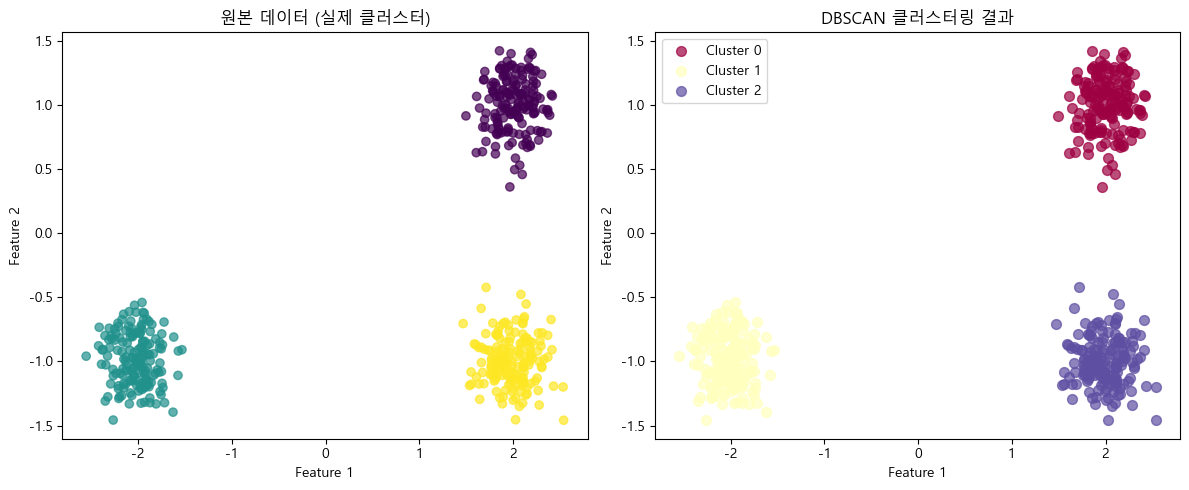

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', alpha=0.7)
plt.title('원본 데이터 (실제 클러스터)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBSCAN 결과 시각화
plt.subplot(1, 2, 2)
unique_labels = set(cluster_labels)
colors = ['red' if label == -1 else plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # 노이즈 포인트는 검은색 x로 표시
        class_member_mask = (cluster_labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=50, alpha=0.7, label='Noise')
    else:
        class_member_mask = (cluster_labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[color], alpha=0.7, s=50, label=f'Cluster {label}')

plt.title('DBSCAN 클러스터링 결과')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
print("=== 상세 분석 ===")
for label in sorted(unique_labels):
    mask = cluster_labels == label
    points = X[mask]
    if label == -1:
        print(f"\n노이즈 포인트들:")
        print(f"  - 개수: {len(points)}")
        if len(points) > 0:
            print(f"  - 평균 위치: [{points[:, 0].mean():.2f}, {points[:, 1].mean():.2f}]")
    else:
        print(f"\n클러스터 {label}:")
        print(f"  - 개수: {len(points)}")
        print(f"  - 중심: [{points[:, 0].mean():.2f}, {points[:, 1].mean():.2f}]")
        print(f"  - 범위 X: [{points[:, 0].min():.2f}, {points[:, 0].max():.2f}]")
        print(f"  - 범위 Y: [{points[:, 1].min():.2f}, {points[:, 1].max():.2f}]")

=== 상세 분석 ===

클러스터 0:
  - 개수: 167
  - 중심: [2.01, 1.01]
  - 범위 X: [1.50, 2.42]
  - 범위 Y: [0.36, 1.42]

클러스터 1:
  - 개수: 167
  - 중심: [-2.02, -0.99]
  - 범위 X: [-2.55, -1.53]
  - 범위 Y: [-1.46, -0.54]

클러스터 2:
  - 개수: 166
  - 중심: [1.98, -1.00]
  - 범위 X: [1.47, 2.54]
  - 범위 Y: [-1.46, -0.42]


#### **[문제 2]**  

- MNIST Dataset에 대해 Autoencoder를 통해 복원된 Data의 image를 하나 출력하시오

>- 요구조건<br>
$ \ \ $ $\checkmark \ $ Autoencoder를 이용하여 2차원으로 차원축소 하시오<br>
$ \ \ $ $\checkmark \ $ Encoder 2개의 Convolution layer<br>
$ \ \ $ $\checkmark \ $ Decoder 2개의 Upsampling layer<br>
$ \ \ $ $\checkmark \ $ 학습을 위한 epoch수는 10으로 하시오(출력 image의 품질은 낮을 수 있음)<br>

In [32]:
from tensorflow import keras

# 1단계: 데이터 로드 및 전처리
print("=== 1단계: 데이터 로드 및 전처리 ===")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

=== 1단계: 데이터 로드 및 전처리 ===


In [35]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [ ]:
x_train[0]

In [38]:
y_train[0]

np.uint8(5)

In [39]:
# 데이터 정규화 (0~1 범위로)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# 차원 추가 (28, 28) -> (28, 28, 1) - CNN을 위한 채널 차원
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [43]:
print(f"훈련 데이터 크기: {np.shape(x_train)}")
print(f"테스트 데이터 크기: {np.shape(x_test)}")

훈련 데이터 크기: (60000, 28, 28, 1)
테스트 데이터 크기: (10000, 28, 28, 1)


In [44]:
from tensorflow.keras import layers

# 2단계: Encoder 구성 (2개 Convolution layer)
print("\n=== 2단계: Encoder 구성 ===")
input_img = keras.Input(shape=(28, 28, 1))

# 첫 번째 Convolution layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 28x28 -> 14x14

# 두 번째 Convolution layer  
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 14x14 -> 7x7

# Flatten하여 Dense layer로 연결
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# 2차원 latent space로 압축 (핵심 요구사항!)
encoded = layers.Dense(2, activation='linear', name='encoded')(x)

print("Encoder 구조:")
encoder = keras.Model(input_img, encoded)
encoder.summary()


=== 2단계: Encoder 구성 ===
Encoder 구조:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,610 (1.60 MB)

 Trainable params: 420,610 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# 3단계: Decoder 구성 (2개 Upsampling layer)
print("\n=== 3단계: Decoder 구성 ===")
# latent space에서 시작
latent_inputs = keras.Input(shape=(2,))
x = layers.Dense(128, activation='relu')(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation='relu')(x)
x = layers.Reshape((7, 7, 64))(x)

# 첫 번째 Upsampling layer
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 7x7 -> 14x14

# 두 번째 Upsampling layer
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 14x14 -> 28x28

# 최종 출력층 (원본 이미지 크기로 복원)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

print("Decoder 구조:")
decoder = keras.Model(latent_inputs, decoded)
decoder.summary()


=== 3단계: Decoder 구성 ===
Decoder 구조:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3136)           │       404,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,609 (1.76 MB)

 Trainable params: 460,609 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# 4단계: 전체 Autoencoder 모델 구성
print("\n=== 4단계: Autoencoder 모델 구성 ===")
autoencoder = keras.Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("전체 Autoencoder 구조:")
autoencoder.summary()


=== 4단계: Autoencoder 모델 구성 ===
전체 Autoencoder 구조:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 2)              │       420,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 28, 28, 1)      │       460,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881,219 (3.36 MB)

 Trainable params: 881,219 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# 5단계: 모델 학습 (10 epoch)
print("\n=== 5단계: 모델 학습 (10 epoch) ===")
history = autoencoder.fit(
    x_train, x_train,  # input과 target이 동일 (복원이 목표)
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)


=== 5단계: 모델 학습 (10 epoch) ===
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - loss: 0.2822 - mse: 0.0734 - val_loss: 0.2004 - val_mse: 0.0473
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - loss: 0.1960 - mse: 0.0456 - val_loss: 0.1897 - val_mse: 0.0434
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - loss: 0.1872 - mse: 0.0424 - val_loss: 0.1847 - val_mse: 0.0416
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - loss: 0.1832 - mse: 0.0410 - val_loss: 0.1812 - val_mse: 0.0403
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - loss: 0.1807 - mse: 0.0400 - val_loss: 0.1822 - val_mse: 0.0405
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - loss: 0.1786 - mse: 0.0393 - val_loss: 0.1789 - val_mse: 0.0394
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.1773 - mse: 0.0389 - val_loss: 0.1776 - val_mse: 0.0390
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - loss: 0.1767 - mse: 0.0386 - val_loss: 0.1766 - val_mse: 0.0386
Epoch 9/1


=== 6단계: 학습 과정 시각화 ===


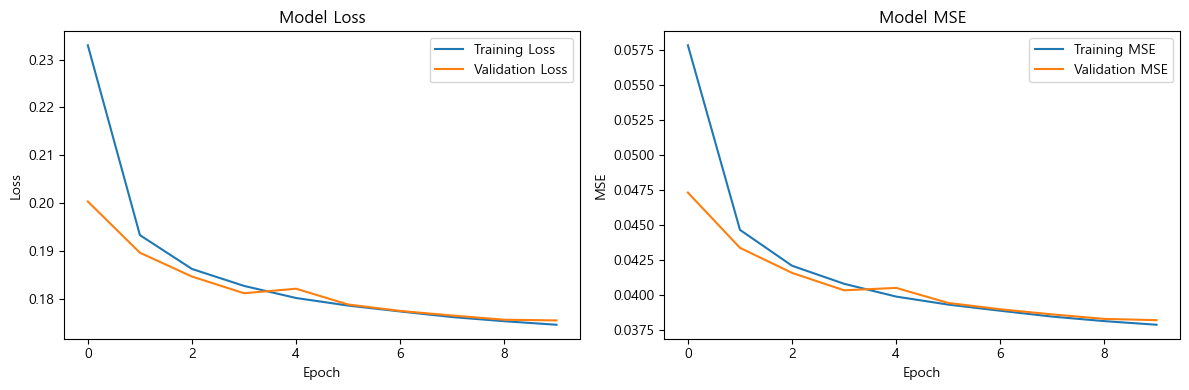

In [48]:
# 6단계: 학습 과정 시각화
print("\n=== 6단계: 학습 과정 시각화 ===")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


=== 7단계: 복원된 이미지 출력 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
2차원 latent space 값들:
이미지 1 (숫자 7): [-1.006, 3.216]
이미지 2 (숫자 2): [0.701, 0.704]
이미지 3 (숫자 1): [-9.379, 9.483]
이미지 4 (숫자 0): [0.343, -0.185]
이미지 5 (숫자 4): [1.507, 5.908]


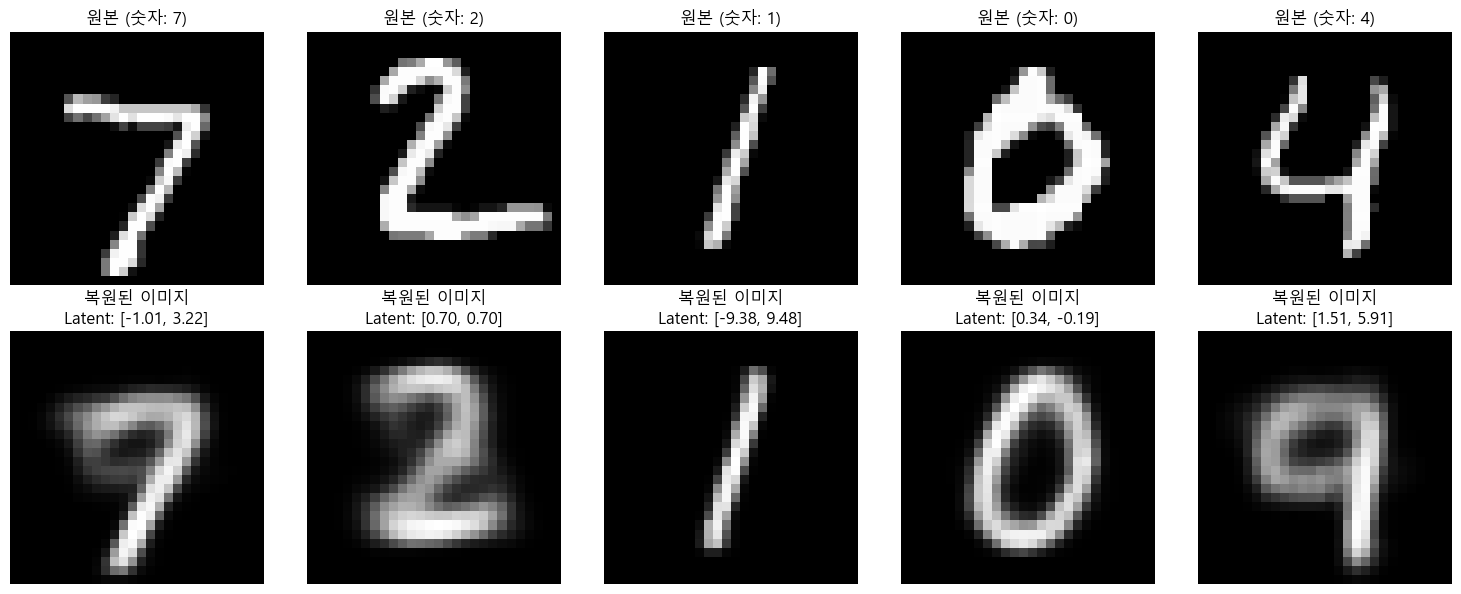

In [49]:
# 7단계: 복원된 이미지 출력 (문제에서 요구한 핵심!)
print("\n=== 7단계: 복원된 이미지 출력 ===")

# 테스트 데이터에서 몇 개 샘플 선택
n_samples = 5
test_samples = x_test[:n_samples]

# 원본 → 인코딩 → 디코딩 과정
encoded_imgs = encoder.predict(test_samples)
decoded_imgs = autoencoder.predict(test_samples)

# 2차원 latent space 값 출력
print("2차원 latent space 값들:")
for i in range(n_samples):
    print(f"이미지 {i+1} (숫자 {y_test[i]}): [{encoded_imgs[i][0]:.3f}, {encoded_imgs[i][1]:.3f}]")

# 시각화: 원본 vs 복원된 이미지
plt.figure(figsize=(15, 6))

for i in range(n_samples):
    # 원본 이미지
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(test_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'원본 (숫자: {y_test[i]})')
    plt.axis('off')
    
    # 복원된 이미지
    plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'복원된 이미지\nLatent: [{encoded_imgs[i][0]:.2f}, {encoded_imgs[i][1]:.2f}]')
    plt.axis('off')

plt.tight_layout()
plt.show()


=== 8단계: 2차원 latent space 분포 시각화 ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


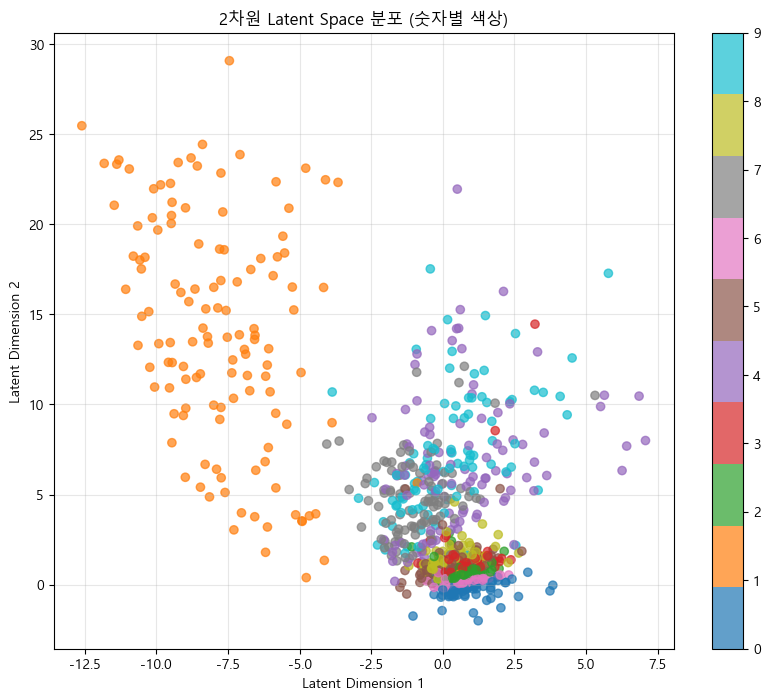

In [50]:
# 8단계: 2차원 latent space 분포 시각화
print("\n=== 8단계: 2차원 latent space 분포 시각화 ===")

# 더 많은 테스트 데이터로 latent space 시각화
n_viz = 1000
test_encoded = encoder.predict(x_test[:n_viz])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_encoded[:, 0], test_encoded[:, 1], 
                     c=y_test[:n_viz], cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('2차원 Latent Space 분포 (숫자별 색상)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True, alpha=0.3)
plt.show()

In [51]:
# 9단계: 성능 평가
print("\n=== 9단계: 성능 평가 ===")
# 복원 품질 측정
mse_scores = []
for i in range(len(test_samples)):
    original = test_samples[i].reshape(28, 28)
    reconstructed = decoded_imgs[i].reshape(28, 28)
    mse = np.mean((original - reconstructed) ** 2)
    mse_scores.append(mse)
    print(f"이미지 {i+1} MSE: {mse:.6f}")

print(f"평균 복원 MSE: {np.mean(mse_scores):.6f}")


=== 9단계: 성능 평가 ===
이미지 1 MSE: 0.021560
이미지 2 MSE: 0.062825
이미지 3 MSE: 0.003943
이미지 4 MSE: 0.045315
이미지 5 MSE: 0.030761
평균 복원 MSE: 0.032881



=== 10단계: 복원된 이미지 1개 출력 (문제 요구사항) ===
가장 잘 복원된 이미지: 3번 (MSE: 0.003943)


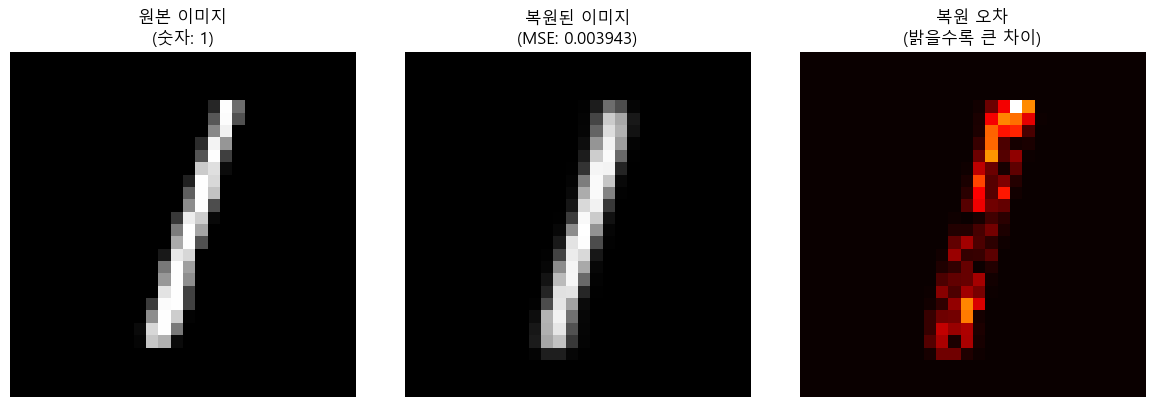

In [52]:
# 10단계: 문제에서 요구한 "복원된 이미지 하나" 특별 출력
print("\n=== 10단계: 복원된 이미지 1개 출력 (문제 요구사항) ===")
# 가장 잘 복원된 이미지 선택
best_idx = np.argmin(mse_scores)
print(f"가장 잘 복원된 이미지: {best_idx+1}번 (MSE: {mse_scores[best_idx]:.6f})")

plt.figure(figsize=(12, 4))

# 원본
plt.subplot(1, 3, 1)
plt.imshow(test_samples[best_idx].reshape(28, 28), cmap='gray')
plt.title(f'원본 이미지\n(숫자: {y_test[best_idx]})')
plt.axis('off')

# 복원된 이미지
plt.subplot(1, 3, 2)
plt.imshow(decoded_imgs[best_idx].reshape(28, 28), cmap='gray')
plt.title(f'복원된 이미지\n(MSE: {mse_scores[best_idx]:.6f})')
plt.axis('off')

# 차이점 시각화
plt.subplot(1, 3, 3)
diff = np.abs(test_samples[best_idx].reshape(28, 28) - decoded_imgs[best_idx].reshape(28, 28))
plt.imshow(diff, cmap='hot')
plt.title('복원 오차\n(밝을수록 큰 차이)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
print(f"   - 2차원 latent space: {encoded_imgs[best_idx]}")
print(f"   - 복원 품질 (MSE): {mse_scores[best_idx]:.6f}")

   - 2차원 latent space: [-9.378589  9.482864]
   - 복원 품질 (MSE): 0.003943


#### **[문제 3]** 

- [문제 2]의 Autoencoder Network을 이용하여  latent space의 분포로부터 5개의 sample을 추출하여 새로운 data를 <br> 생성하여 생성된 image를 출력하시오

#### **[문제 4]**  

- 당신은 카드사의 데이터 분석가입니다. 시스템에 기록된 고객들의 신용카드 거래 로그 데이터를 분석하여 <br> **비정상적인 거래(이상치)** 를 탐지하는 임무를 맡았습니다. 정상적인 거래는 보통 소액으로, 특정 시간대에 <br>  집중되는 경향이 있습니다. 반면, 카드 도용으로 의심되는 비정상 거래는 다음과 같은 특징을 보일 수 있습니다. <br>
$ \ \ $ (i) 거래 금액이 비정상적으로 높음 <br>
$ \ \ $ (ii) 평소 거래가 없던 심야 시간대에 갑자기 발생 <br>
$ \ \ $ (iii) 짧은 시간 내에 여러 번의 거래가 발생 <br>

- 아래 generate_data 함수로 생성된 transactions_data를 사용하여, 통계적 기법(Z-Score)을 직접 구현하여 <br>  이상 거래 내역을 탐지하는 코드를 작성하세요<br>
$ \ \ $ $\checkmark \ $ 최종 목표: 이상치로 탐지된 거래의 transaction_id와 해당 거래 내역(딕셔너리)을 출력해야 합니다. <br>

> **Dataset 설명**  <br>
> - 이 데이터는 1,000건의 카드 거래 기록을 시뮬레이션한 것임<br>
> $ \ \ $ $\checkmark \ $ transaction_id: 거래 고유 ID <br>
> $ \ \ $ $\checkmark \ $ timestamp: 거래 발생 시각 <br>
> $ \ \ $ $\checkmark \ $ amount: 거래 금액 (원) <br>
> $ \ \ $ $\checkmark \ $ hour_of_day: 거래 발생 시간 (0-23시) <br>

In [3]:
import random
import math

def generate_data(n_samples=1000):
    """
    카드 거래 데이터를 생성합니다.
    """
    # 데이터셋 재현을 위한 시드 설정
    random.seed(42)

    # 정상 데이터 생성
    # 거래 시간은 주로 주간(9-20시)에 집중
    # 거래 금액은 평균 3만원, 표준편차 1.5만원
    # Data가 List내에 Dictionary 구조로 되어 있음
    
    data = []
    for i in range(n_samples):
        hour = int(random.normalvariate(14, 4)) % 24
        amount = abs(random.normalvariate(30000, 15000))
        data.append({
            'transaction_id': i,
            'amount': amount,
            'hour_of_day': hour
        })

    # 이상치(Anomalies) 주입
    data[100].update({'amount': 500000, 'hour_of_day': 3})
    data[300]['amount'] = 1200000
    data[500]['hour_of_day'] = 4
    data[700]['amount'] = 300000
    data[900].update({'amount': 450000, 'hour_of_day': 2})
    
    return data

# 1. 데이터 생성
transactions_data = generate_data()


#### **[문제 5]**  

- GAN을 이용하여 data 5개를 생성하여 생성된 image를 출력하시오
  
>- 요구조건<br>
$ \ \ $ $\checkmark \ $ MNIST Dataset을 이용하시오<br>
$ \ \ $ $\checkmark \ $ 3개 layer로 구성된 Generator Network을 사용하시오<br>
$ \ \ $ $\checkmark \ $ 생성되는 image는 $28 \times 28$ image임<br>
$ \ \ $ $\checkmark \ $ 학습을 위한 epoch수는 10으로 하시오(출력 image의 품질은 낮을 수 있음)